# Assignment 2

**name:** Benoit Dervieux (bd222ch)

**email:** bd222ch@student.lnu.se

## Lecture 2 - Part 2

1. Read the dataset and store the values in the variables.

In [1]:
import numpy as np   
import matplotlib.pyplot as plt 

data = np.genfromtxt('./datasets/housing-boston.csv', delimiter=',')
data = data[1:]

Xe = data[:, :2]
y = data[:, 2:3]

2. Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

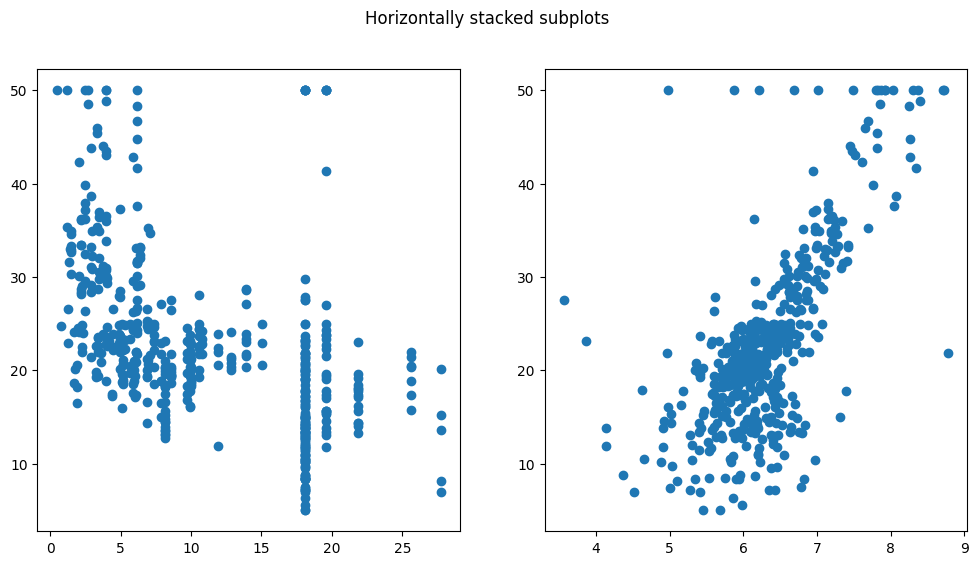

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(Xe[:, 0], y)
ax1.set_title("Indus")
ax2.scatter(Xe[:, 1], y)
ax2.set_title("RM")
plt.show()

3. Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [3]:
import MachineLearningModel as ml

model = ml.RegressionModelNormalEquation(1)
model.fit(Xe, y)
print("Beta:", model.beta)
print("Cost:", model.cost)
X_predict_indus = np.array([[2.31, 6.575]])
prediction_indus = model.predict(X_predict_indus)
print("Prediciton:", prediction_indus)

Beta: [[-22.89831573]
 [ -0.33471389]
 [  7.82205511]]
Cost: [[39.14548321]]
Prediciton: [[27.75850755]]


4. Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

## Answer: ##
Normalized values represent the non-normlaized values in a more compact scale. Beta values change because they are adapted to the scale of the normalized values. In other terms, the first beta values have been set up according to the scale of the X values not normalized. As it aims for the same final prediction, then it has to change between the normalized data and the non-normalized one in order to produce similar results.

In [4]:
# Here we are going to normalize the data
# First the indus column
X_indus_mean = np.mean(Xe[:,0])
X_indus_std = np.std(Xe[:,0])
Xe_normalized = np.array(Xe)
Xe_normalized[:,0] = (Xe_normalized[:,0] - X_indus_mean) / X_indus_std
# Then the RM column
X_rm_mean = np.mean(Xe[:,1])
X_rm_std = np.std(Xe[:,1])
Xe_normalized[:,1] = (Xe_normalized[:,1] - X_rm_mean) / X_rm_std

model_norm = ml.RegressionModelNormalEquation(1)
model_norm.fit(Xe_normalized, y)
print("Beta:", model_norm.beta)
print("Cost:", model_norm.cost)
X_predict_norm = np.array([[2.31, 6.575]])
# We need to normalize the prediction data here as well
X_predict_norm[:,0] = (X_predict_norm[:,0] - X_indus_mean) / X_indus_std
X_predict_norm[:,1] = (X_predict_norm[:,1] - X_rm_mean) / X_rm_std
prediction_norm = model_norm.predict(X_predict_norm)
print("Prediciton:", prediction_norm)

Beta: [[22.53280632]
 [-2.29398525]
 [ 5.49047659]]
Cost: [[39.14548321]]
Prediciton: [[27.75850755]]


5. Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

## Answer: ##
We see that the curve of normalized data takes more iterations to reach its a steady value for the MSE compared to the not normalized data. However, the normalized data manages to reach an MSE closer to the one obtained using the normal equation. Hence, this is more accurate.


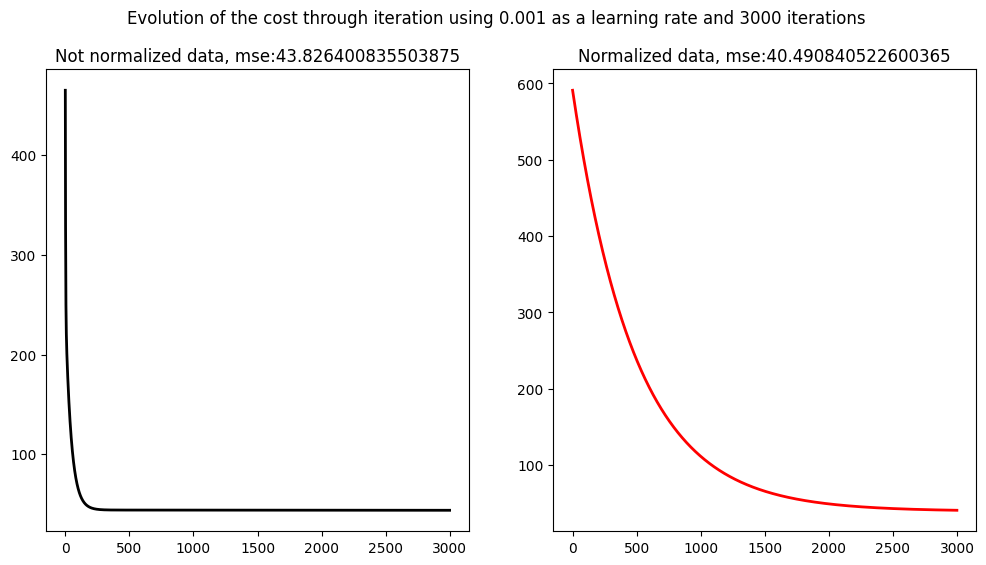

In [5]:
model_gradient = ml.RegressionModelGradientDescent(1)
model_gradient.fit(Xe, y)
model_results = model_gradient.cost

model_gradient_normalized = ml.RegressionModelGradientDescent(1)
model_gradient_normalized.fit(Xe_normalized, y)
model_results_normalized = model_gradient_normalized.cost

fig, (bx1, bx2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Evolution of the cost through iteration using 0.001 as a learning rate and 3000 iterations')
bx1.plot([x for x in range(model_gradient.num_iterations)], model_results, color='black', linewidth=2, label="Prediction")
bx1.set_title("Not normalized data, mse:" + str(model_results[len(model_results)-1]))
bx2.plot([x for x in range(model_gradient_normalized.num_iterations)], model_results_normalized, color='red', linewidth=2, label="Prediction")
bx2.set_title("Normalized data, mse:" + str(model_results_normalized[len(model_results_normalized)-1]))
plt.show()

6. Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

## Answer: ##
The cost found using the normal equation was: 39.14548321.

In order to be 1% close to this cost, we need to be able to find a cost which is at maximum 39.5369348.

From what we analyzed from the 5, the normalized data help in reaching the a MSE close to what the normal equation produces.

Here the Learning rate was 0.01, large enough without provoking any misbehavior and the number of iterations was 3000. It led to a MSE that is close to what the normal equation produced and hence with a variation of less than 1%.


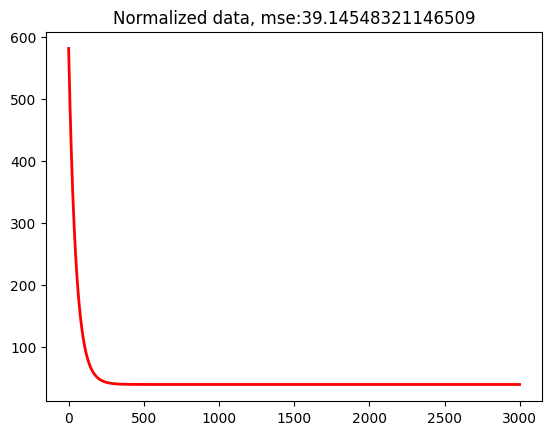

In [6]:
model_gradient_normalized = ml.RegressionModelGradientDescent(1, learning_rate=0.01, num_iterations=3000)
model_gradient_normalized.fit(Xe_normalized, y)
model_results_normalized = model_gradient_normalized.cost


plt.plot([x for x in range(model_gradient_normalized.num_iterations)], model_results_normalized, color='red', linewidth=2, label="Prediction")
plt.title("Normalized data, mse:" + str(model_results_normalized[len(model_results_normalized)-1]))
plt.show()

## Lecture 2, Part 3

1. Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


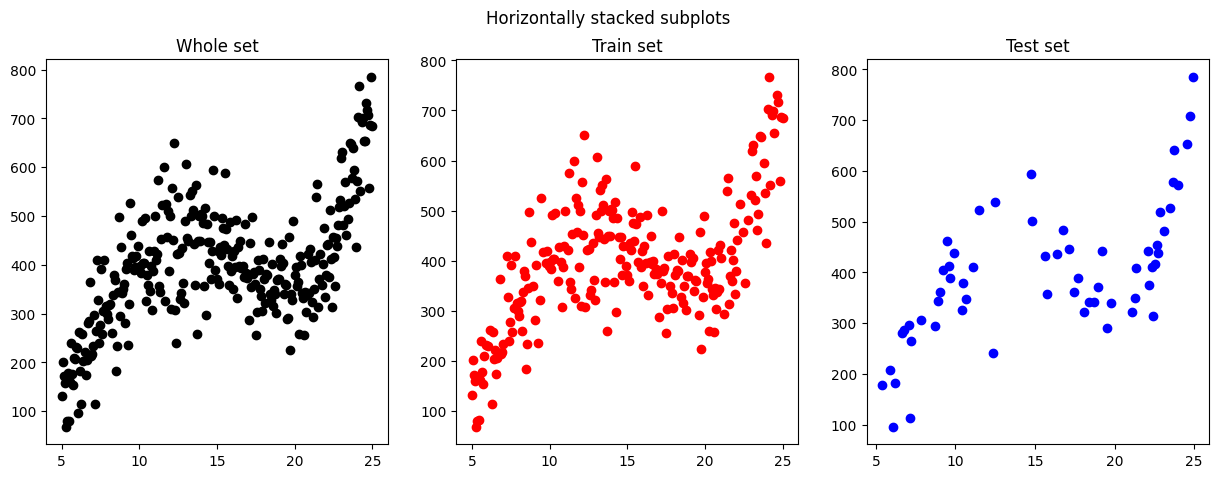

In [23]:
data = np.genfromtxt('./datasets/secret_polynomial.csv', delimiter=',')
data = data[1:,]
np.random.shuffle(data)
X = data[:, 0]
y = data[:, 1]

split = int(0.8*X.shape[0])

X_train = X[:split]
Y_train = y[:split]
X_test = X[split:]
Y_test = y[split:]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(X, y, color='black', linewidth=1, label="Whole set")
ax1.set_title("Whole set")
ax2.scatter(X_train, Y_train, color='red', linewidth=1, label="Train set")
ax2.set_title("Train set")
ax3.scatter(X_test, Y_test, color='blue', linewidth=1, label="Test set")
ax3.set_title("Test set")
plt.show()

2. Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

According to the different plots, we could say that all figure from degree 3 to degree 6 are fitting the curve perfectly. However, the problem of having a too high degree could be over fitting. Hence, it could be fair to simplify the choice of degree and stick with the degree 3 to have a model that does not overfit the data using higher degrees.

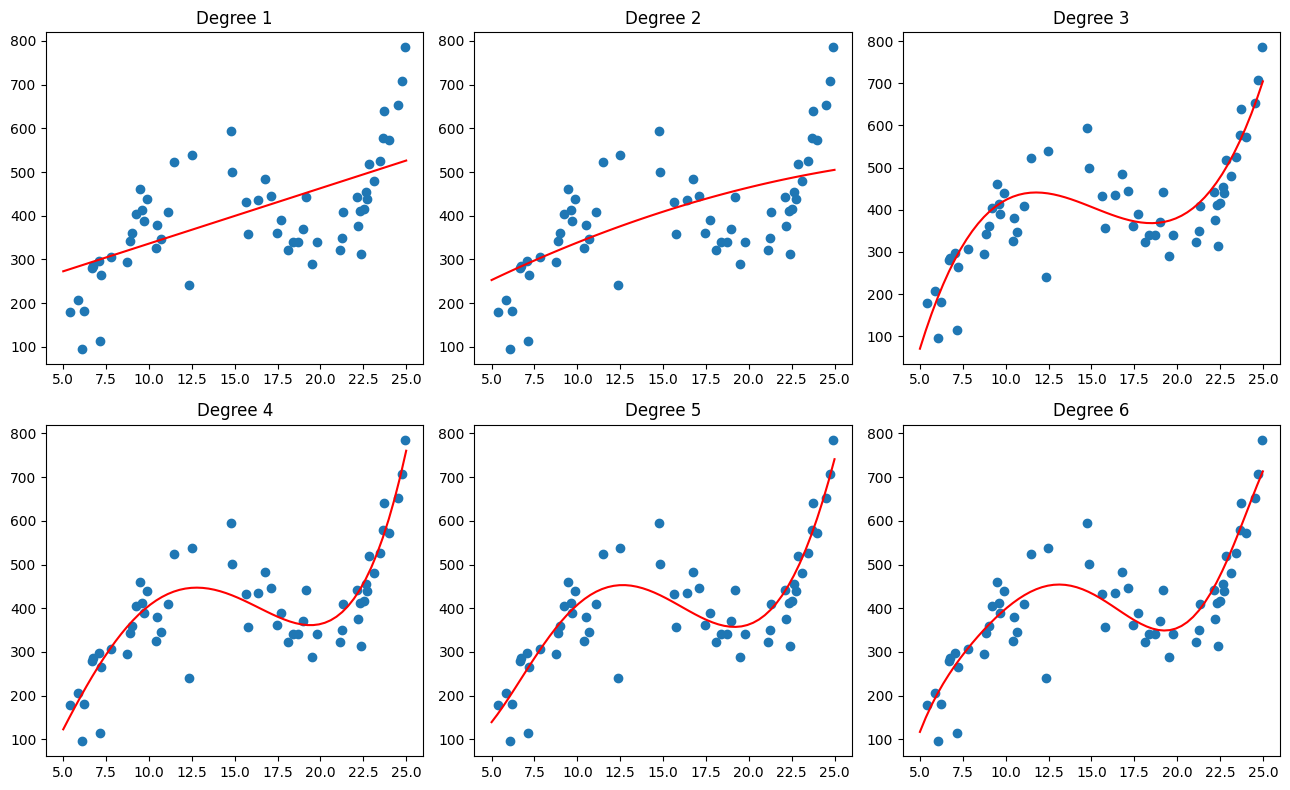

In [24]:
X_test_refined = np.linspace(X_train.min(), X_train.max(), X_test.shape[0])

fig, axs = plt.subplots(2, 3, figsize=(13, 8))
for i, ax in enumerate(axs.flat):
    model_gradient = ml.RegressionModelNormalEquation(i+1)
    model_gradient.fit(X_train, Y_train)
    y_prediction = model_gradient.predict(X_test_refined)
    ax.scatter(X_test, Y_test)
    ax.plot(X_test_refined, y_prediction, color='red')
    ax.set_title(f'Degree {i+1}')
plt.tight_layout()
plt.show()

3. To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why?

## Answer: ##
By using this approach, I can see that a degree 3 follows the data correctly for every type of data. Hence, this way of visualizing the data can help us to decide if a model is a good fit for a number of data points given (by shuffling here) or not. We see that the curve of degree 3 fits the cloud of points which reinforces the opinion I had previously.

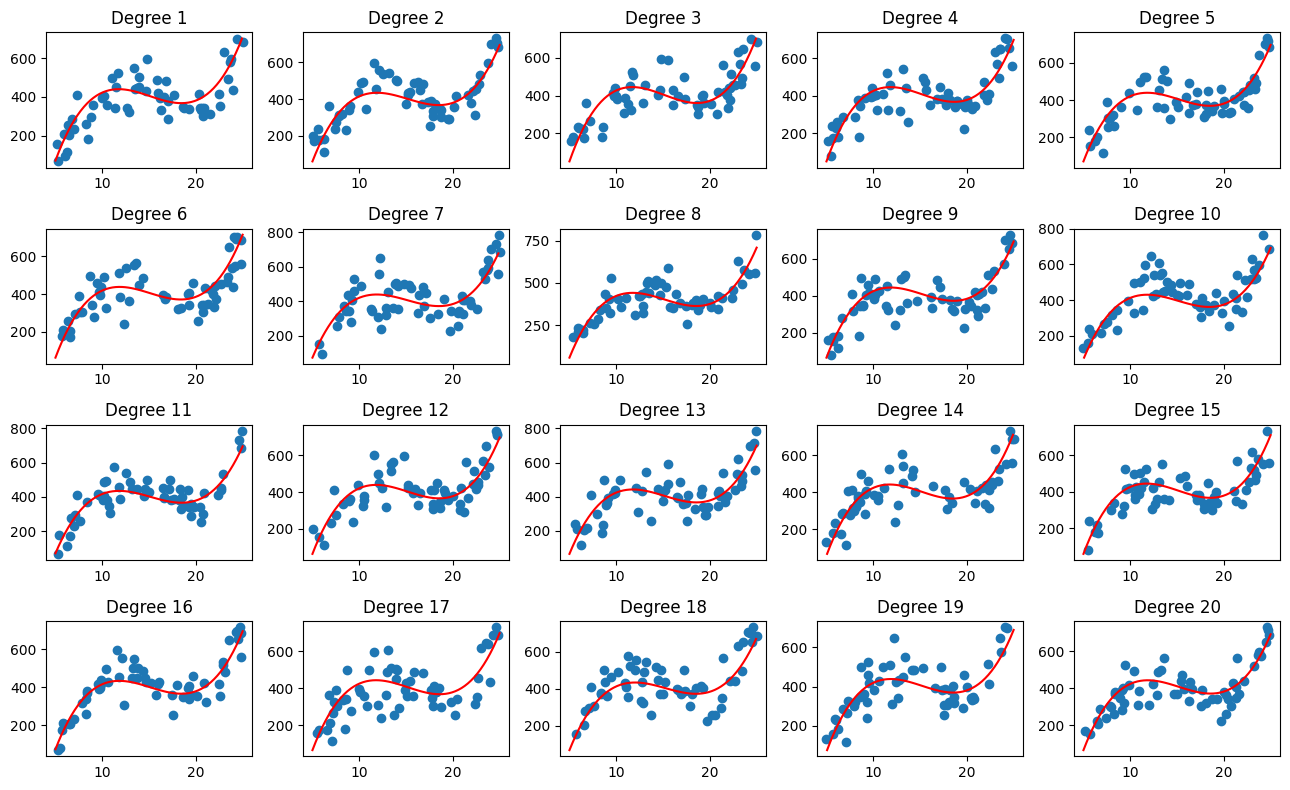

In [25]:
fig, axs = plt.subplots(4, 5, figsize=(13, 8))
for i, ax in enumerate(axs.flat):
    np.random.shuffle(data)
    X = data[:, 0]
    y = data[:, 1]
    split = int(0.8*X.shape[0])
    X_train = X[:split]
    Y_train = y[:split]
    X_test = X[split:]
    Y_test = y[split:]
    model_gradient = ml.RegressionModelNormalEquation(3)
    model_gradient.fit(X_train, Y_train)
    X_test_refined = np.linspace(X_train.min(), X_train.max(), X_test.shape[0])
    y_prediction = model_gradient.predict(X_test_refined)
    ax.scatter(X_test, Y_test)
    ax.plot(X_test_refined, y_prediction, color='red')
    ax.set_title(f'Degree {i+1}')
plt.tight_layout()
plt.show()

## Lecture 3 - Part 2

1. Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

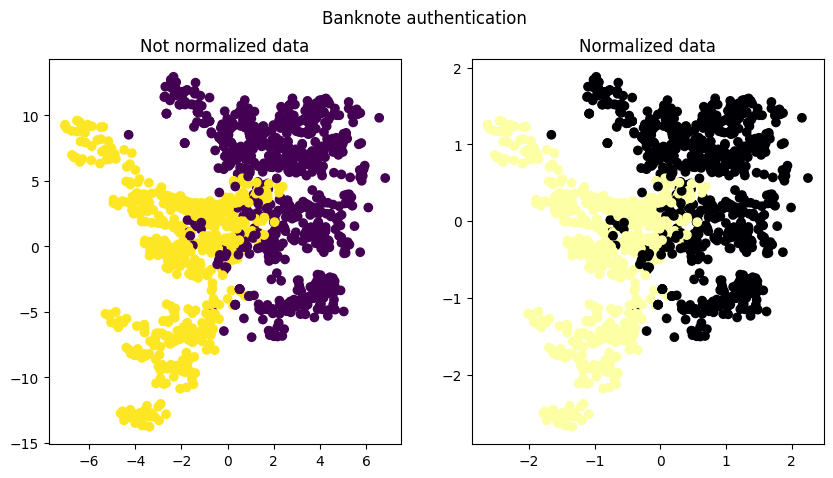

In [10]:
from matplotlib.colors import ListedColormap
data = np.genfromtxt('./datasets/banknote_authentication.csv', delimiter=',')
np.random.shuffle(data)
X = data[:,:2]
y = data[:,2]
X_normalized = np.zeros_like(X, dtype=float)
for i in range(X.shape[1]):
    mean_f = np.mean(X[:,i])
    std_f = np.std(X[:, i])
    X_normalized[:,i] = (X[:,i] - mean_f)/std_f
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Banknote authentication')
ax1.scatter(X[:,0], X[:,1], c=y, cmap="viridis")
ax1.set_title("Not normalized data")
ax2.scatter(X_normalized[:,0], X_normalized[:,1], c=y, cmap="inferno")
ax2.set_title("Normalized data")
plt.show()

2.  Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [11]:
split = int(0.8*X.shape[0])
X_train = X_normalized[:split]
Y_train = y[:split]
X_test = X_normalized[split:]
Y_test = y[split:]

3. Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

## Answer: ##
Seeing both graphs, we can see that the cost is converging to its minimum quite rapidly when we use bigger learning rates and smaller iterations. To keep it reasonable, I have choosen a learning rate of 0.05 and 2000 iterations.
However, we can see that similar results can be obtained by higher learning rates and fewer simulations.

The same approach used in lecture 2 part 3 could have been chosen here but I decided to display a good enough result obtained after several trials.


Evaluation Log: 0.8618181818181818
Beta: [[-0.32538568]
 [-2.97767435]
 [-1.62511946]]
Evaluation No log: 0.8981818181818182


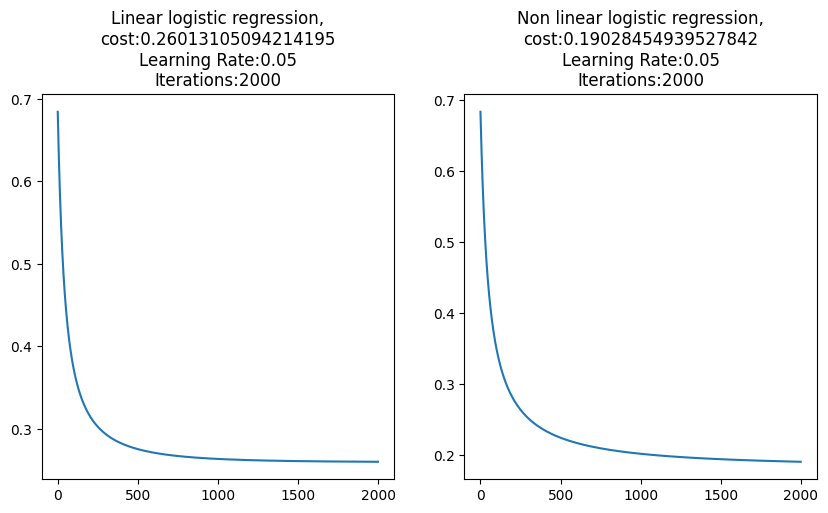

In [12]:
#--- Write your code here ---#
logReg = ml.LogisticRegression(learning_rate=0.05, num_iterations=2000)
logReg.fit(X_train, Y_train)
print("Evaluation Log:", logReg.evaluate(X_test, Y_test))
print("Beta:", logReg.params)
NoLogReg = ml.NonLinearLogisticRegression(degree=2, learning_rate=0.05, num_iterations=2000)
NoLogReg.fit(X_train, Y_train)
print("Evaluation No log:",NoLogReg.evaluate(X_test, Y_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot([x for x in range(len(logReg.results))], logReg.results)
ax1.set_title("Linear logistic regression,\ncost:" + str(logReg.cost) + "\nLearning Rate:" + str(logReg.learning_rate) + "\nIterations:" + str(logReg.num_iterations))
ax2.plot([x for x in range(len(NoLogReg.results))], NoLogReg.results)
ax2.set_title("Non linear logistic regression,\ncost:" + str(NoLogReg.cost) + "\nLearning Rate:" + str(NoLogReg.learning_rate) + "\nIterations:" + str(NoLogReg.num_iterations))
plt.show()
plt.close()

5. Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

## Answer: ##
Using Boxplot, we can see the Nonlinear Logistic Regression model performs better than the linear one with a median evaluation of 0.92 vs one at 0.89
Hence, both model are not qualitatively the same and the non-linear regression performs best.

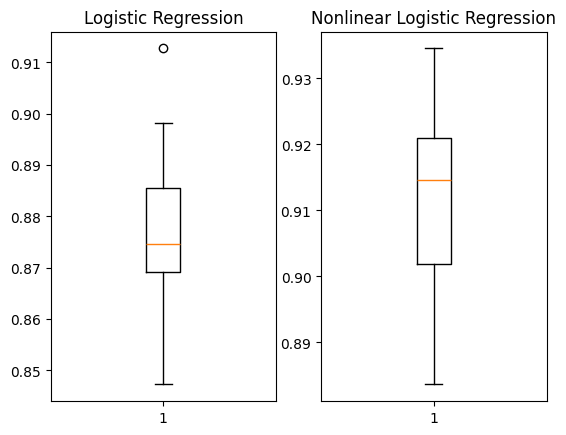

In [13]:
def divide_random_20_80(data):
    np.random.shuffle(data)
    X = data[:,:2]
    y = data[:,2]
    for i in range(X.shape[1]):
        mean_f = np.mean(X[:,i])
        std_f = np.std(X[:, i])
        X_normalized[:,i] = (X[:,i] - mean_f)/std_f
    split = int(0.8*X.shape[0])
    X_train = X_normalized[:split]
    Y_train = y[:split]
    X_test = X_normalized[split:]
    Y_test = y[split:]
    return X_train, Y_train, X_test, Y_test

accuracy_logistic = []
accuracy_nonlinear = []

for i in range(20):
    X_train, Y_train, X_test, Y_test = divide_random_20_80(data)
    logReg = ml.LogisticRegression(learning_rate=0.001 * (i + 1) * 2, num_iterations=5000)
    logReg.fit(X_train, Y_train)
    evaluation = logReg.evaluate(X_test, Y_test)
    accuracy_logistic.append(evaluation)
    logReg = ml.NonLinearLogisticRegression(learning_rate=0.001 * (i + 1) * 2, num_iterations=5000)
    logReg.fit(X_train, Y_train)
    evaluation = logReg.evaluate(X_test, Y_test)
    accuracy_nonlinear.append(evaluation)
plt.subplot(1, 2, 1)
plt.boxplot(accuracy_logistic)
plt.title('Logistic Regression')
plt.subplot(1, 2, 2)
plt.boxplot(accuracy_nonlinear)
plt.title('Nonlinear Logistic Regression')
plt.show()

6. Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

## Answer: ## 

In terms of accuracy, we find similar results than what we had previously in the question 5. and it makes sense.

Visually speaking, this is where it gets interesting. We can see that the linear regression is a straight line, hence each zone englobes more "unwanted" dots (and produce more errors and less accuracy) than the non-linear model as the non-linear model have a curve allowing it to englobe the needed points more easily. This explains the difference of performances between those 2 models as the non-linear model has more flexibility.

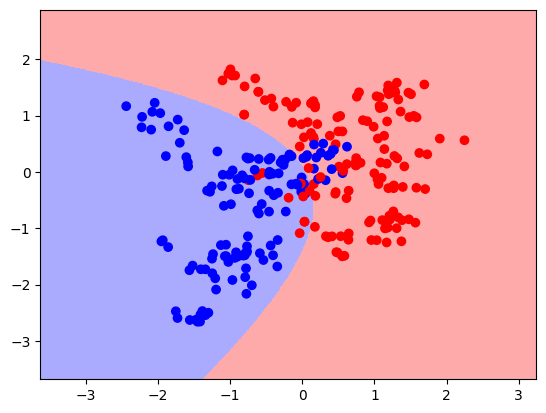

Accuracy Non-Linear Logistic Regression: 0.9018181818181819


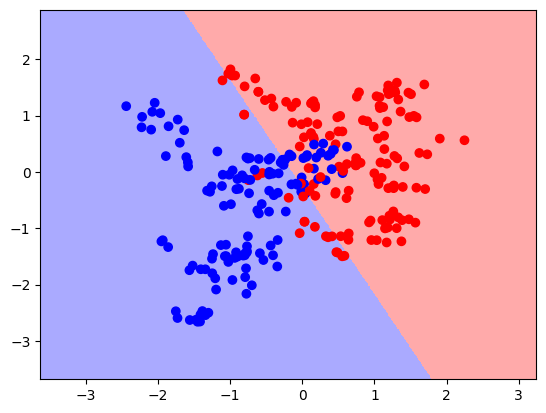

Accuracy Logistic Regression : 0.850909090909091


In [14]:
h = 0.01
X_min, X_max = X_normalized[:, 0].min() - 1, X_normalized[:, 0].max() + 1
Y_min, Y_max = X_normalized[:, 1].min() - 1, X_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
x1, x2 = xx.ravel(), yy.ravel()
NoLogReg = ml.NonLinearLogisticRegression(learning_rate=0.01, num_iterations=5000)
XXe = np.c_[x1, x2]
NoLogReg.fit(X_train, Y_train)
p = NoLogReg.predict(XXe)
classes = p > 0.5
clz_mesh = classes.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2)
plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
plt.show()

accuracy = 0
prediction = NoLogReg.predict(X_test)
for i in range(len(prediction)):
    if Y_test[i] == prediction[i]:
        accuracy += 1
accuracy = accuracy / len(prediction)
print("Accuracy Non-Linear Logistic Regression:", accuracy)

h = 0.01
LogReg = ml.LogisticRegression(learning_rate=0.01, num_iterations=5000)
XXe = np.c_[x1, x2]
LogReg.fit(X_train, Y_train)
p = LogReg.predict(XXe)
classes = p > 0.5
clz_mesh = classes.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2)
plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
plt.show()

accuracy = 0
prediction = LogReg.predict(X_test)
for i in range(len(prediction)):
    if Y_test[i] == prediction[i]:
        accuracy += 1
accuracy = accuracy / len(prediction)
print("Accuracy Logistic Regression :", accuracy)

## Lecture 4, Part 2

1. Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [15]:
from ForwardSelection import ForwardSelection
from ROCAnalysis import ROCAnalysis

def normalize(X):
    for i in range(X.shape[1]):
        mean_f = np.mean(X[:,i])
        std_f = np.std(X[:,i])
        X[:,i] = (X[:,i] - mean_f)/std_f
    return X, mean_f, std_f

def create_split(seed, X, y):
    np.random.seed(seed)
    indices = np.arange(X.shape[0]) # create array of indices 
    np.random.shuffle(indices)
    split = int(0.8*X.shape[0])
    
    X_train = X[indices[:split]]
    y_train = y[indices[:split]]
    X_test = X[indices[split:]]
    y_test = y[indices[split:]]
    return X_train, X_test, y_train, y_test

data = np.genfromtxt('./datasets/heart_disease_cleveland.csv', delimiter=',', skip_header=1) 
X = data[:, :-1]  # Features
y = data[:, -1]   # Target variable
X_norm, mu, sigma = normalize(X)
seeds = [2]

X_subdataset, X_validation, y_subdataset, y_validation = create_split(seeds[0], X_norm, y)

2. Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

## Answer: ##
The learning rate I am using is 0.05 and the number of iterations is 3000. Those two rates have proven to be very effective into finding a good accuracy in the linear model previously in the lecture 3 section.

By appliying the forward selection, we can see that a model with a lower number of features is selected. The one I have presently is 12, 11, 1, 4, 10, 2, 7, 0, 5, 3, 6, 9 but it depends on how the data is shuffled and how we trained the different models.

This means that using only those features from the original X set of features, we are supposed to make better predictions than using all 13 of them.

In [26]:
f_select_lr = ForwardSelection(X_subdataset, y_subdataset, ml.LogisticRegression(learning_rate=0.05, num_iterations=3000))
f_select_lr.forward_selection()
print("Forward selection:")
print("Selected features:", f_select_lr.selected_features)
print("Number of features:", len(f_select_lr.selected_features))
print("Cost:",f_select_lr.best_cost)

Forward selection:
Selected features: [12, 11, 1, 4, 10, 2, 7, 0, 5, 3, 6, 9]
Number of features: 12
Cost: 0.9411764705882353


3. Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

## Answer: ##
Depending on how the data is shuffled, the forward selection sometimes produces better results and sometimes it does not. However, they are often pretty likely. 

This shows us that it is possible to have better (and simpler) performing model using forward selection but this does not guarantee better performances all the time.

In [17]:
#--- Write your code here ---#
f_select_lr.fit()
y_pred = f_select_lr.predict(X_validation[:, f_select_lr.selected_features])
roc = ROCAnalysis(y_pred, y_validation)

print("Forward selection:")
print("TP rate:",roc.tp_rate())
print("Fp rate:",roc.fp_rate())
print("Precision:",roc.precision())
print("F-score:",roc.f_score())


lr = ml.LogisticRegression(learning_rate=0.05, num_iterations=3000)
lr.fit(X_subdataset, y_subdataset)
y_pred = lr.predict(X_validation)
roc = ROCAnalysis(y_pred, y_validation)
print()
print("Logitic regression")

print("TP rate:",roc.tp_rate())
print("Fp rate:",roc.fp_rate())
print("Precision:",roc.precision())
print("F-score:",roc.f_score())

Forward selection:
TP rate: 0.8333333333333334
Fp rate: 0.12903225806451613
Precision: 0.8620689655172413
F-score: 0.847457627118644

Logitic regression
TP rate: 0.8333333333333334
Fp rate: 0.16129032258064516
Precision: 0.8333333333333334
F-score: 0.8333333333333334
